# 卷积神经网络（CNN）基础概念与公式推导

## 1. 基础概念

### 1.1 卷积神经网络简介
卷积神经网络（Convolutional Neural Network, CNN）是一种专门用于处理具有网格状拓扑结构数据的深度学习模型，广泛应用于图像分类、目标检测、语义分割等领域。CNN通过卷积操作提取局部特征，并利用池化操作降低计算复杂度。

### 1.2 核心组件
- **卷积层（Convolutional Layer）**：通过卷积核提取输入数据的局部特征。
- **激活函数（Activation Function）**：引入非线性，增强模型的表达能力。
- **池化层（Pooling Layer）**：对特征图进行降维，减少计算量。
- **全连接层（Fully Connected Layer）**：将提取的特征映射到输出空间。

---

## 2. 数学公式推导

### 2.1 卷积操作的本质
卷积操作可以分为**连续型卷积**和**离散型卷积**，其本质是描述一个函数 $ f(x) $ 对另一个函数 $ g(x) $ 的影响。在CNN中，$ f(x) $ 表示卷积核（权重），而 $ g(x) $ 表示输入信号（如图像）。

#### 2.1.1 连续型卷积
连续型卷积的数学定义为：
$$
(f * g)(t) = \int_{-\infty}^{\infty} f(\tau) g(t - \tau) \, d\tau
$$
其中：
- $ f(\tau) $ 是卷积核（权重函数）。
- $ g(t - \tau) $ 是输入信号，经过平移后与卷积核相乘并积分。

#### 2.1.2 离散型卷积
离散型卷积的数学定义为：
$$
(f * g)[n] = \sum_{m=-\infty}^{\infty} f[m] g[n - m]
$$
在CNN中，输入信号通常是二维图像，卷积核也是二维矩阵，因此离散型卷积可以扩展为二维形式：
$$
Y[i, j] = \sum_{m=0}^{K_h-1} \sum_{n=0}^{K_w-1} X[i + m, j + n] \cdot K[m, n]
$$
其中：
- $ X $: 输入图像。
- $ K $: 卷积核。
- $ Y $: 输出特征图。

#### 2.1.3 权重函数的本质
卷积核 $ K $ 的作用是对输入信号 $ X $ 的局部区域进行加权求和。每个权重值表示对应位置像素的重要性，通过训练调整这些权重，CNN可以自动学习到输入数据中的重要特征。

---

### 2.2 池化操作的本质
池化操作的核心思想是利用图像或特征图中相邻像素之间的相似性，用一个像素代替一片区域内的所有像素。这不仅减少了数据的维度，还能增强模型的鲁棒性（对小范围的平移、缩放等变化不敏感）。

#### 2.2.1 最大池化（Max Pooling）
最大池化选择每个池化窗口内的最大值作为输出：
$$
Y_{\text{pool}}[i, j, c] = \max_{m=0}^{P_h-1} \max_{n=0}^{P_w-1} Y[i \cdot S_p + m, j \cdot S_p + n, c]
$$

#### 2.2.2 平均池化（Average Pooling）
平均池化计算每个池化窗口内的平均值作为输出：
$$
Y_{\text{pool}}[i, j, c] = \frac{1}{P_h \cdot P_w} \sum_{m=0}^{P_h-1} \sum_{n=0}^{P_w-1} Y[i \cdot S_p + m, j \cdot S_p + n, c]
$$

#### 2.2.3 池化的作用
- **降维**：减少特征图的大小，从而降低计算复杂度。
- **去噪**：通过选取代表性像素（最大值或平均值），去除噪声干扰。
- **平移不变性**：池化操作使得模型对输入的小范围平移更加鲁棒。

---

## 3. 反向传播

### 3.1 损失函数
假设损失函数为 $ L $，则反向传播的目标是最小化损失函数：
$$
L = \frac{1}{N} \sum_{i=1}^N \ell(y_i, \hat{y}_i)
$$
其中 $ y_i $ 是真实标签，$ \hat{y}_i $ 是预测值。

### 3.2 参数更新
通过链式法则计算梯度并更新参数。以卷积层为例，权重 $ K $ 和偏置 $ b $ 的梯度分别为：
$$
\frac{\partial L}{\partial K} = \frac{\partial L}{\partial Y} \cdot \frac{\partial Y}{\partial K}
$$
$$
\frac{\partial L}{\partial b} = \frac{\partial L}{\partial Y} \cdot \frac{\partial Y}{\partial b}
$$

使用梯度下降法更新参数：
$$
K \leftarrow K - \eta \cdot \frac{\partial L}{\partial K}
$$
$$
b \leftarrow b - \eta \cdot \frac{\partial L}{\partial b}
$$
其中 $ \eta $ 是学习率。

---

## 4. 总结

### 4.1 卷积的本质
卷积操作的本质是通过卷积核（权重函数）对输入信号进行局部加权求和，从而提取输入数据中的重要特征。卷积核的权重通过训练自动调整，能够捕捉到输入数据中的模式和规律。

### 4.2 池化的本质
池化操作的本质是利用相邻像素之间的相似性，用一个像素代替一片区域内的所有像素。这不仅减少了数据的维度，还能增强模型的鲁棒性和平移不变性。

### 4.3 CNN的优势
卷积神经网络通过卷积、激活、池化和全连接等操作，能够高效地提取图像中的局部特征并进行分类或回归任务。其核心在于卷积操作的参数共享和稀疏连接，大大减少了模型的参数量和计算复杂度。

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F
#transforms 提供的数据处理工具
import torchvision.transforms as transforms
#由于数据集比较大，我们通过工具在线下载数据集
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader

我们首先来介绍一下这个下载函数

`CIFAR10` 类 `torchvision.datasets` 模块中的一个类，专门用于加载 CIFAR-10 数据集。它的构造函数接受以下参数：

 - `root`  类型：字符串 指定数据集存储的根目录路径
 - `train` 类型：布尔值 指定加载的是训练集还是测试集
 - `download` 类型：布尔值 指定是否在数据集不存在时自动从互联网下载
 - `transform` 类型：可调用对象（通常是 torchvision.transforms 中的变换函数） 对加载的数据进行预处理或数据增强
   - 在这里，`transforms.ToTensor()` 将 PIL 图像或 NumPy 数组转换为 PyTorch 张量，并将像素值从 `[0, 255]` 归一化到 `[0, 1]`。 




--- 

我们来介绍一下数据集

- trainset和testset可以直接用下标访问

- 每个样本为一个元组(data,label)

- data是3*32*32的Tensor，表示图像

- label时0-9之间的整数，代表图像的类别

Files already downloaded and verified
Files already downloaded and verified
训练集大小： 50000
测试集大小： 10000
[6 9 9 ... 9 1 1]
[   29    30    35 ... 49941 49992 49994]
[    4     5    32 ... 49993 49998 49999]
[    6    13    18 ... 49987 49991 49995]
[    9    17    21 ... 49979 49982 49983]
[    3    10    20 ... 49981 49984 49990]
[   27    40    51 ... 49964 49980 49988]
[    0    19    22 ... 49962 49966 49996]
[    7    11    12 ... 49965 49978 49986]
[    8    62    69 ... 49968 49976 49985]
[    1     2    14 ... 49963 49971 49997]


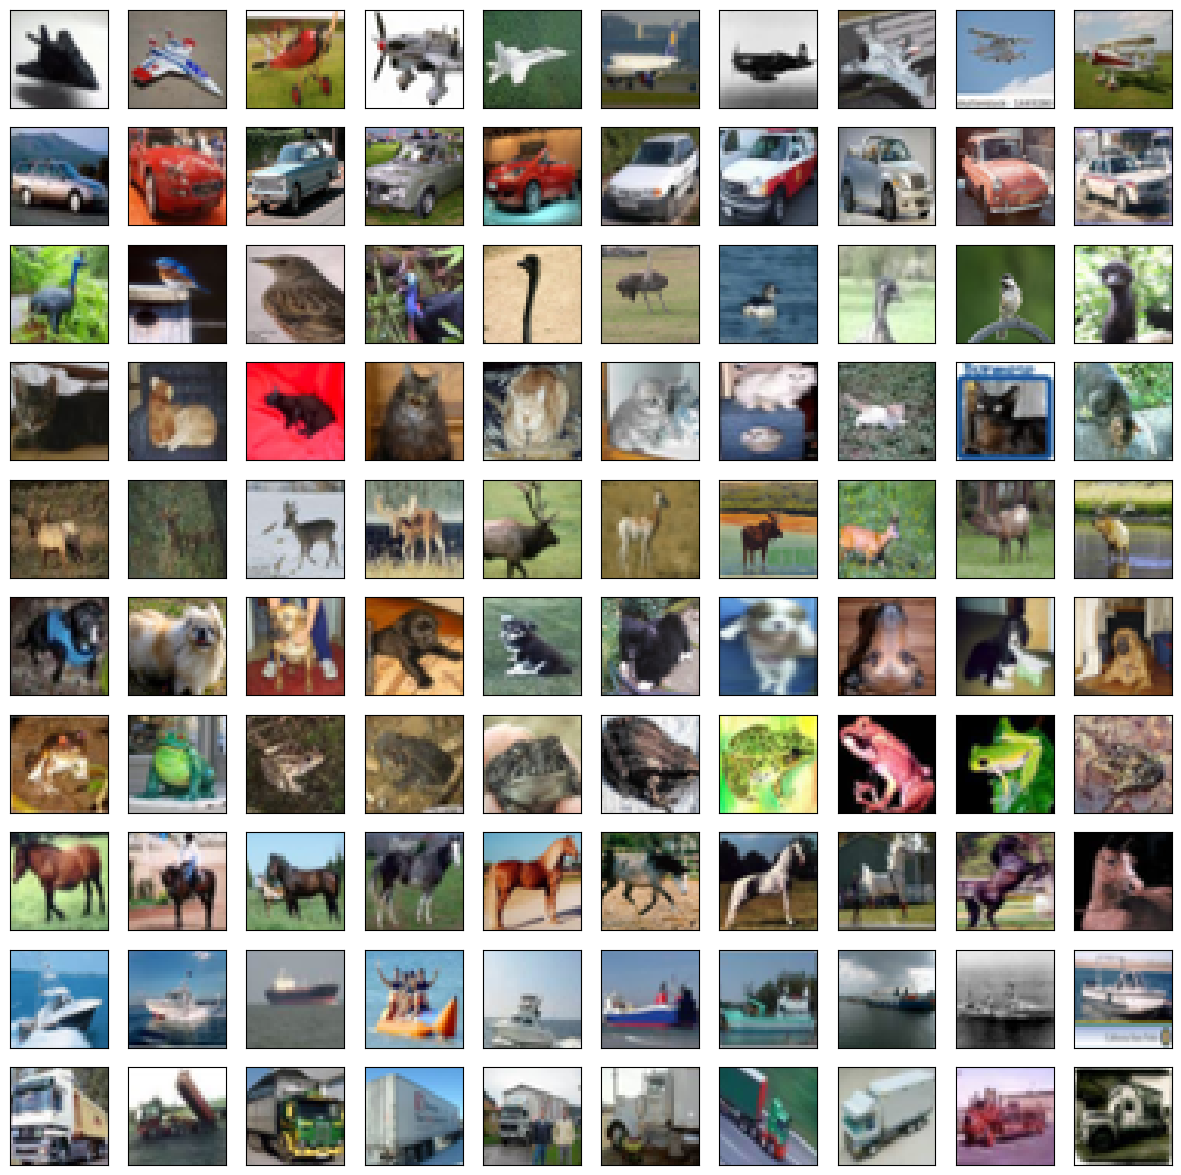

In [7]:
#下载数据集和测试集
data_path='./cifar10'
trainset=CIFAR10(root=data_path,train=True,download=True,transform=transforms.ToTensor())

testset=CIFAR10(root=data_path,train=False,download=True,transform=transforms.ToTensor())

print('训练集大小：',len(trainset))
print('测试集大小：',len(testset))

#可视化数据集
num_classes=10
fig,axes=plt.subplots(num_classes,10,figsize=(15,15))
labels=np.array([t[1] for t in trainset])  #取出所有样本的标签  上文所示 [data,label]
print(labels)
for i in range(num_classes):
  indice=np.where(labels==i)[0] #类别为i的图像的下标
  print(indice)
  for j in range(10): #展示前十张图像
    #matplotlib绘制RGB图像时
    #图像矩阵依次时宽、高、颜色、与数据集中有差别
    #因此需要用permute重排数据的坐标轴
    axes[i][j].imshow(trainset[indice[j]][0].permute(1, 2, 0).numpy())
    # 去除坐标刻度
    axes[i][j].set_xticks([]) 
    axes[i][j].set_yticks([])
plt.show() 
  


看到这里，我有一个异或 既然labels是一个数组

那为什么 np.where(label==i) 是一个数组呢？

请看下文

In [ ]:
label=np.array([1,2,3,4,5,6,2])
indice=np.where(label==2)[0]
print(np.where(label==2))  #嗷嗷嗷 原来他返回的是一个元组
print(indice)

(array([1, 6], dtype=int64),)
[1 6]


好的 接下来我们来实现CNN

首先我们来介绍一下参数

 `Conv2D` :二维卷积层，参数依次为

-  `in_channels` : 输入通道
-  `out_channels`：输出通道，即卷积核个数
-  `kernel_size` ：卷积核大小，默认为正方形
-  `padding` ：填充层数，padding=1表示对输入四周各填充一层，默认填充0

--- 

### 介绍一下丢弃层

在卷积神经网络（CNN）中，丢弃层（Dropout Layer） 是一种常用的正则化技术，用于防止模型过拟合。它通过随机“丢弃”一部分神经元（即将其输出设置为 0），强制网络学习更加鲁棒的特征表示。

- 在每次训练迭代中，以一定的概率 p 随机将部分神经元的输出置为 0。
- 被丢弃的神经元在当前迭代中不参与前向传播和反向传播。
- 在测试阶段，所有神经元都参与计算，但它们的输出会被缩放（乘以 1-p），以保持期望输出的一致性。

--- 

### 介绍一下全连接层

在 CNN 中，全连接层通常位于卷积层之后。由于卷积层的输出是一个三维张量（通道数、高度、宽度），需要将其展平为一维向量，才能输入到全连接层中。

--- 

In [13]:
class CNN(nn.Module):

  def __init__(self, num_classes=10):
    super().__init__()
    # 类别数目
    self.num_classes=num_classes
    # Conv2D为二维卷积层，参数依次为
    # in_channels：输入通道
    # out_channels：输出通道，即卷积核个数
    # kernel_size：卷积核大小，默认为正方形
    # padding：填充层数，padding=1表示对输入四周各填充一层，默认填充0
    self.conv1=nn.Conv2d(in_channels=3,out_channels=32,kernel_size=3,padding=1)
    
    #第二层卷积，输入通道与上一层的输出通道保持一致
    self.conv2=nn.Conv2d(32,32,3,padding=1)

    #最大池化 kernel_size表示窗口大小，默认为正方形
    self.pooling1=nn.MaxPool2d(kernel_size=2)

    # 丢弃层，p表示每个位置被置为0的概率
    # 随机丢弃只在训练时开启，在测试时应当关闭
    self.dropout1=nn.Dropout(p=0.25)

    self.conv3=nn.Conv2d(32,64,3,padding=1)
    self.conv4=nn.Conv2d(64,64,3,padding=1)
    self.pooling2=nn.MaxPool2d(2)
    self.dropout2=nn.Dropout(0.25)

    #全连接层，输入维度4096=64*8*8 与上一层的输出一致
    self.fc1=nn.Linear(4096,512)
    self.dropout3=nn.Dropout(0.5)
    self.fc2=nn.Linear(512,num_classes)
  # 向前传播，将输入按顺序以此通过设置好的层
  def forward(self,x):
   x = F.relu(self.conv1(x))
   x = F.relu(self.conv2(x))
   x = self.pooling1(x)
   x = self.dropout1(x)
   x = F.relu(self.conv3(x))
   x = F.relu(self.conv4(x))
   x = self.pooling2(x)
   x = self.dropout2(x)

   # 全连接层之前，将x的形状转为 (batch_size, n)
   x = x.view(len(x), -1)
   x = F.relu(self.fc1(x))
   x = self.dropout3(x)
   x = self.fc2(x)
   return x
    

In [14]:
batch_size = 64 # 批量大小
learning_rate = 1e-3 # 学习率
epochs = 5 # 训练轮数
np.random.seed(0)
torch.manual_seed(0)

# 批量生成器
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False)

model = CNN()
# 使用Adam优化器
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
# 使用交叉熵损失
criterion = F.cross_entropy

# 开始训练
for epoch in range(epochs):
    losses = 0
    accs = 0
    num = 0
    model.train() # 将模型设置为训练模式，开启dropout
    with tqdm(trainloader) as pbar:
        for data in pbar:
            images, labels = data
            outputs = model(images) # 获取输出
            loss = criterion(outputs, labels) # 计算损失
            # 优化
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            # 累积损失
            num += len(labels)
            losses += loss.detach().numpy() * len(labels)
            # 精确度
            accs += (torch.argmax(outputs, dim=-1) \
                == labels).sum().detach().numpy()
            pbar.set_postfix({
                'Epoch': epoch, 
                'Train loss': f'{losses / num:.3f}', 
                'Train acc': f'{accs / num:.3f}'
            })
    
    # 计算模型在测试集上的表现
    losses = 0
    accs = 0
    num = 0
    model.eval() # 将模型设置为评估模式，关闭dropout
    with tqdm(testloader) as pbar:
        for data in pbar:
            images, labels = data
            outputs = model(images)
            loss = criterion(outputs, labels)
            num += len(labels)
            losses += loss.detach().numpy() * len(labels)
            accs += (torch.argmax(outputs, dim=-1) \
                == labels).sum().detach().numpy()
            pbar.set_postfix({
                'Epoch': epoch, 
                'Test loss': f'{losses / num:.3f}', 
                'Test acc': f'{accs / num:.3f}'
            })


100%|██████████| 157/157 [00:02<00:00, 60.70it/s, Epoch=4, Test loss=0.837, Test acc=0.709]
